In [5]:
%load_ext autoreload
%autoreload 2


In [6]:
import cv2
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("..")


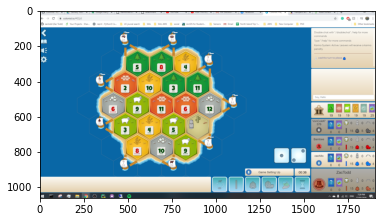

In [7]:
import colonist_ql.interface_interaction.feature_extration as fe
import colonist_ql.interface_interaction.game_image_extraction as ie
import colonist_ql.analytics.visualise as visualise

# ie.blocking_til_play()
image = ie.game_image()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [8]:
hexes = fe.initial_board_extraction(image)


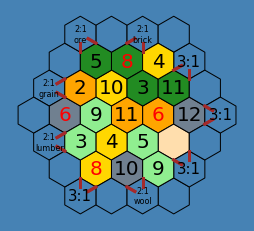

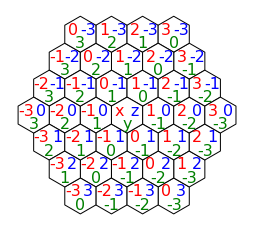

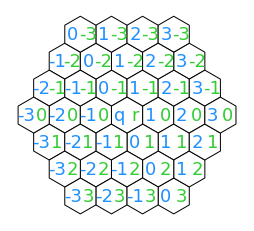

In [9]:
visualise.draw_board(hexes)
visualise.draw_coords(hexes)
visualise.draw_coords(hexes, "axial")

In [10]:
import colonist_ql.game_structure.structures as structures

for h in hexes:
    structures.Hexes().add(h)

In [12]:
triples = structures.placement_phase_settlement_triples()
tc = fe.extract_settlements(image, triples)
for t, c in tc.items():
    structures.Settlement(t)

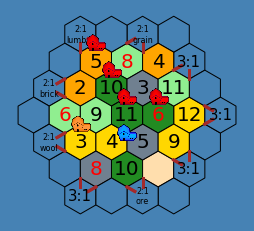

In [37]:
import colonist_ql.facts as facts

fig, ax = plt.subplots(1)
fig.patch.set_facecolor(facts.RESOURCE_COLOURS[facts.TILES.SEA])
ax.set_aspect("equal")

visualise._draw_settlements(tc, ax)
visualise._draw_hexes(hexes, ax)
visualise._draw_ports()

ax.scatter(0, 0, alpha=0)
ax.axis("off")
plt.show()


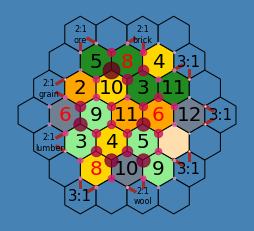

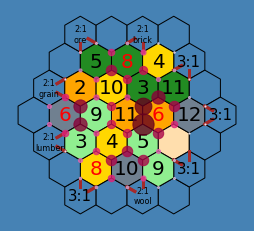

In [13]:

visualise.plot_triples_heatmap()
visualise.plot_triples_diversity_heatmap()

